<a href="https://colab.research.google.com/github/InGev007/startup_acd/blob/main/lesson%2047/Lesson_47.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Лекція 47

##Завдання:

Протестуйте описані в лекції методи і моделі на датасеті AirPassenger, що міститься на GitHub в папці лекції та містить дані про коливання кількості пасажирів авіаліній із часом. Порівняйте метрики оцінки моделі для двох датасетів.

##Рішення:

###Підключаємо бібліотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sa

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings("ignore")

###Підгружаємо та аналізуємо данні

In [2]:
series = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AirPassengers.csv')
series.rename(columns={'#Passengers': 'passengers'}, inplace=True)
series.head()

,Month,passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


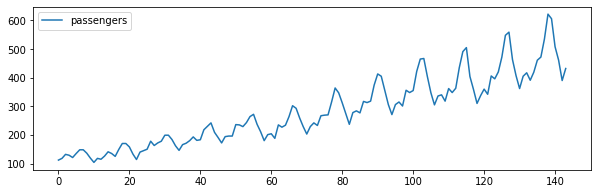

In [3]:
matplotlib.rcParams['figure.figsize'] = [10, 3]
series.plot()
pyplot.show()

In [4]:
acf_value = acf(series.passengers)
pacf_value = pacf(series.passengers, nlags = 3)

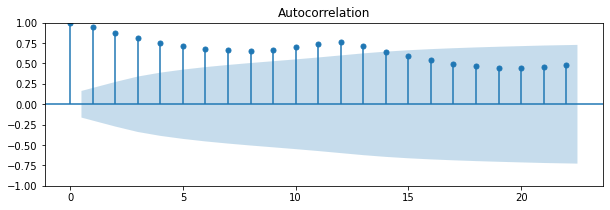

In [5]:
matplotlib.rcParams['figure.figsize'] = [10, 3]
plot_acf(series.passengers)
pyplot.show()

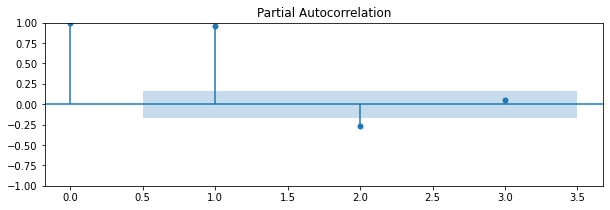

In [6]:
plot_pacf(series.passengers, lags =3)
pyplot.show()

In [7]:
print(series.passengers)

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: passengers, Length: 144, dtype: int64


###Навчання моделі ARIMA

In [8]:
src_data_model = series.passengers[:110]
model = sa.tsa.ARIMA(src_data_model).fit()

In [9]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             passengers   No. Observations:                  110
Model:                          ARIMA   Log Likelihood                -645.320
Date:                Fri, 24 Mar 2023   AIC                           1294.641
Time:                        19:30:21   BIC                           1300.041
Sample:                             0   HQIC                          1296.831
                                - 110                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        232.6818      9.214     25.253      0.000     214.623     250.741
sigma2      7301.0128   1211.633      6.026      0.000    4926.256    9675.770
===================================================================================
Ljung-Box (L1) (Q):                 100.21   Jarque-Bera (JB):                 7.19
Prob(Q):                              0.00   Prob(JB):                         0.03
Heteroskedasticity (H):               1.55   Skew:                             0.61
Prob(H) (two-sided):                  0.19   Kurtosis:                         2.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
pred = model.predict(110,143, typ='levels')
len(pred)

34

<Axes: >

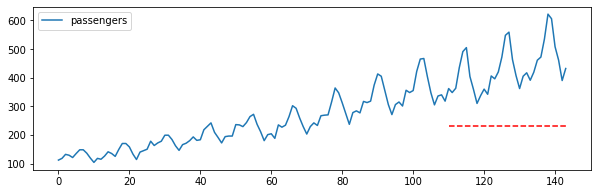

In [11]:
series.plot()
pred.plot(style='r--')

In [12]:
comp = series.passengers[110:144]
len(comp)

34

####Тестування моделі ARIMA

In [13]:
mae_test_a1 = mean_absolute_error(comp, pred)
rmse_test_a1 = np.sqrt(mean_squared_error(comp, pred))
mape_test_a1 = mean_absolute_percentage_error(comp, pred)

print(f'MAE test: {mae_test_a1: .2f}\n'
      f'RMSE test: {rmse_test_a1: .2f}\n'
      f'MAPE test:{mape_test_a1: .2f}')

MAE test:  201.67
RMSE test:  215.70
MAPE test: 0.45


###Навчання моделі SARIMAX

In [14]:
model = sa.tsa.statespace.SARIMAX(src_data_model, seasonal_order=(2,2,2,12)).fit()


In [15]:
pred = model.predict(110,143, typ='levels')

<Axes: >

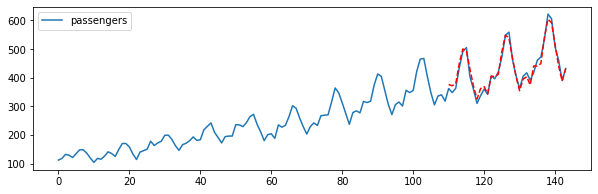

In [16]:
series.plot()
pred.plot(style='r--')

####Тестування моделі SARIMAX

In [17]:
mae_test_a2 = mean_absolute_error(comp, pred)
rmse_test_a2 = np.sqrt(mean_squared_error(comp, pred))
mape_test_a2 = mean_absolute_percentage_error(comp, pred)

print(f'MAE test: {mae_test_a2: .2f}\n'
      f'RMSE test: {rmse_test_a2: .2f}\n'
      f'MAPE test:{mape_test_a2: .2f}')

MAE test:  12.41
RMSE test:  14.51
MAPE test: 0.03


##Висновки:

По результатах тестування моделей найкращі результати показала модель SARIMAX так як данні містять явно вираженний тренд та сезонність